In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

pd.set_option('display.max_rows', 100)

In [64]:
def look_for_number_of_clusters(scaled_audio_features):
    inertia = []
    silhouette_score_list = []
    max_k = 30

    for k in range(2, max_k):
        k_means = KMeans(n_clusters=k, random_state=123)
        k_means.fit(scaled_audio_features)

        inertia.append(k_means.inertia_)
        silhouette_score_list.append(silhouette_score(scaled_audio_features, k_means.labels_))

    # Plot inertia
    fig, ax = plt.subplots(figsize=(12, 6))
    plt.title(f'Inertia evolution from 1 cluster to {max_k} clusters')
    sns.lineplot(x=range(2, max_k), y=inertia)
    sns.scatterplot(x=range(2, max_k), y=inertia)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()

    # Plot silhouette score
    plt.title(f'Silhouette score evolution from 2 clusters to {max_k} clusters')
    sns.lineplot(x=range(2, max_k), y=silhouette_score_list)
    sns.scatterplot(x=range(2, max_k), y=silhouette_score_list)
    plt.show()

def check_number_of_iterations(scaled_audio_features):
    inertia = []
    silhouette_score_list = []
    max_n = 30

    for k in range(10, max_n):
        k_means = KMeans(n_clusters=13, n_init=max_n, random_state=123)
        k_means.fit(scaled_audio_features)

        inertia.append(k_means.inertia_)
        silhouette_score_list.append(silhouette_score(scaled_audio_features, k_means.labels_))

    # Plot inertia
    fig, ax = plt.subplots(figsize=(12, 6))
    plt.title(f'Inertia evolution from 10 iterations to {max_n} iterations')
    sns.lineplot(x=range(10, max_n), y=inertia)
    sns.scatterplot(x=range(10, max_n), y=inertia)
    plt.xlabel('Number of iterations')
    plt.ylabel('Inertia')
    plt.show()

    # Plot silhouette score
    plt.title(f'Silhouette score evolution from 10 iterations to {max_n} iterations')
    sns.lineplot(x=range(10, max_n), y=silhouette_score_list)
    sns.scatterplot(x=range(10, max_n), y=silhouette_score_list)
    plt.show()
    
def assign_clusters_and_distance_to_centroid(scaled_audio_features, k_means):
    
    dist_cols = ['danceability', 'energy', 'acousticness', 'instrumentalness', 'valence', 'tempo']
    
    centroids = pd.DataFrame(k_means.cluster_centers_, columns=scaled_audio_features.columns)
    scaled_audio_features['cluster'] = k_means.labels_
        
    scaled_audio_features['dist_to_centroid'] = scaled_audio_features.apply(
        lambda row: distance.euclidean(row[dist_cols], centroids.loc[row.cluster]), 
        axis=1
    )
    
    print('inertia: ', k_means.inertia_)
    print('silhouette_score: ', silhouette_score(scaled_audio_features, k_means.labels_))
    
    return scaled_audio_features

### Load data

In [63]:
# 1. read the csv data into a Pandas DataFrame
df_audio_features = pd.read_csv("../data/spotify/audio_features_5000.csv")

df_audio_features.drop_duplicates(subset='name', inplace=True)

df_audio_features.set_index(["artist", "name"], inplace=True)

'''
columns: 
danceability, energy, key, loudness, mode, speechiness, acousticness, 
instrumentalness, liveness, valence, tempo, time_signature
'''
df_audio_features.drop(['duration_ms', 'speechiness', 'key', 'time_signature', 'loudness', 'liveness', 'mode'], inplace=True, axis=1)

df_audio_features.head()

,,danceability,energy,acousticness,instrumentalness,valence,tempo
artist,name,,,,,,
Gilberto Gil,Se Eu Quiser Falar Com Deus,0.658,0.2590,0.694,0.000059,0.306,110.376
Antônio Carlos Jobim,Saudade De Bahia,0.742,0.3990,0.217,0.000002,0.693,125.039
Martinho Da Vila,"Canta Canta, Minha Gente",0.851,0.7300,0.453,0.000063,0.905,93.698
Chico César,Mulher Eu Sei,0.705,0.0502,0.879,0.000041,0.524,106.802
Kurt Elling,Rosa Morena,0.651,0.1190,0.916,0.000343,0.402,120.941


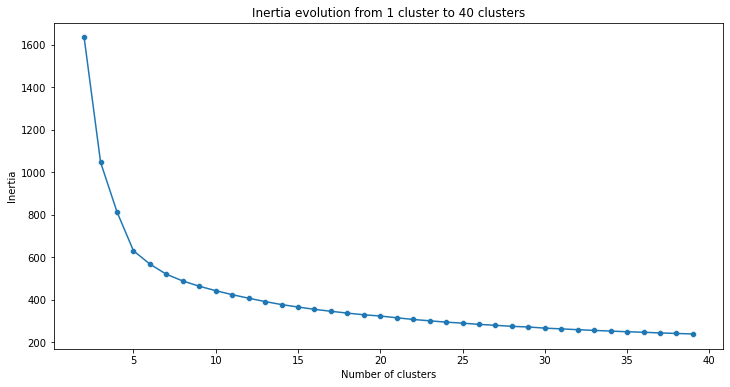

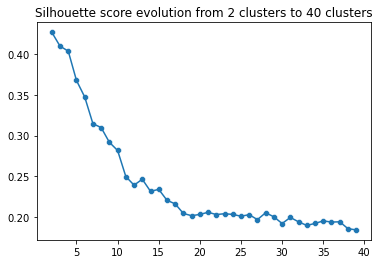

In [5]:
audio_features = df_audio_features.copy()

transformer = MinMaxScaler(feature_range=(0,1))
scaled_audio_features = transformer.fit_transform(audio_features)
scaled_audio_features = pd.DataFrame(scaled_audio_features,
                                     index=audio_features.index,
                                     columns=audio_features.columns)

look_for_number_of_clusters(scaled_audio_features)

### Check number of clusters with Quantile transformer

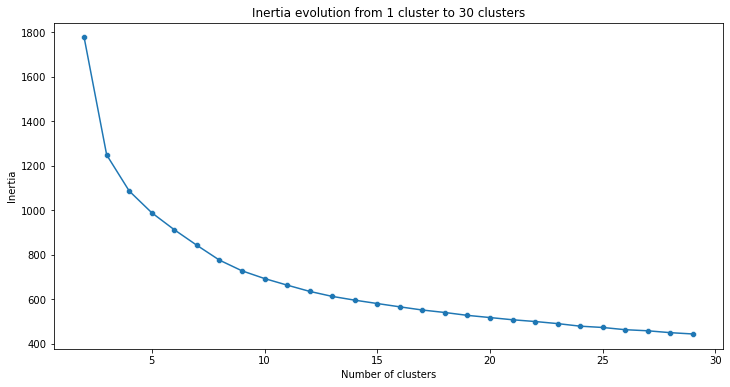

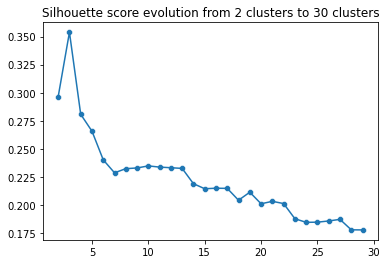

In [65]:
audio_features = df_audio_features.copy()

transformer = QuantileTransformer()
scaled_audio_features = transformer.fit_transform(audio_features)
scaled_audio_features = pd.DataFrame(scaled_audio_features,
                                     index=audio_features.index,
                                     columns=audio_features.columns)

look_for_number_of_clusters(scaled_audio_features)

### Check number of iterations with Quantile transformer

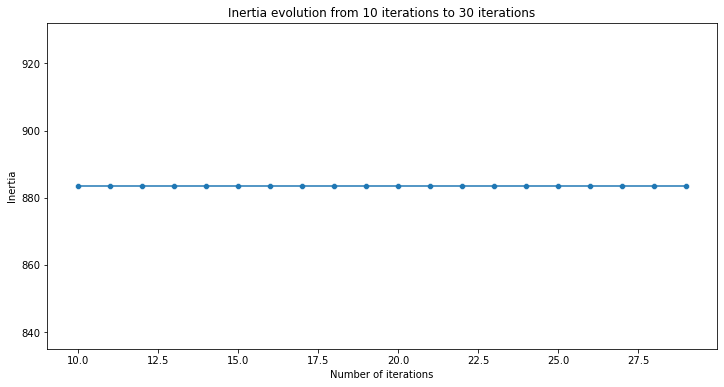

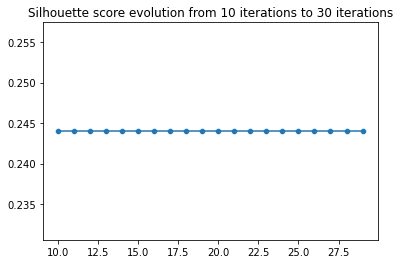

In [25]:
audio_features = df_audio_features.copy()

transformer = QuantileTransformer()
scaled_audio_features = transformer.fit_transform(audio_features)
scaled_audio_features = pd.DataFrame(scaled_audio_features,
                                     index=audio_features.index,
                                     columns=audio_features.columns)

check_number_of_iterations(scaled_audio_features)

### Examine the clusters

In [68]:
# Transform data and strip unnecessary columns
audio_features = df_audio_features.copy()

transformer = QuantileTransformer()
scaled_audio_features = transformer.fit_transform(audio_features)
scaled_audio_features = pd.DataFrame(scaled_audio_features,
                                     index=audio_features.index,
                                     columns=audio_features.columns)
# Check the best values
k_means = KMeans(n_clusters=13, random_state=123)
k_means.fit(scaled_audio_features)

scaled_audio_features = assign_clusters_and_distance_to_centroid(scaled_audio_features, k_means)
scaled_audio_features.head()

inertia:  613.4403278696283
silhouette_score:  0.6419578148921726


,,danceability,energy,acousticness,instrumentalness,valence,tempo,cluster,dist_to_centroid
artist,name,,,,,,,,
Gilberto Gil,Se Eu Quiser Falar Com Deus,0.705205,0.144478,0.796797,0.376235,0.381381,0.412290,10,0.329433
Antônio Carlos Jobim,Saudade De Bahia,0.836837,0.200422,0.612613,0.264656,0.764765,0.596576,11,0.324549
Martinho Da Vila,"Canta Canta, Minha Gente",0.963964,0.481481,0.723661,0.378841,0.941456,0.199067,8,0.295949
Chico César,Mulher Eu Sei,0.780781,0.040883,0.864364,0.364723,0.610611,0.372372,10,0.369214
Kurt Elling,Rosa Morena,0.692192,0.081615,0.882396,0.431433,0.489489,0.533956,10,0.377520


In [50]:
# Assign a label column
scaled_audio_features['label'] = scaled_audio_features.cluster
'''
cluster    genre
0          classical/chill

4          metal/hardcore rock
5          love songs

'''

In [81]:
cluster_num = 12
#scaled_audio_features.label[scaled_audio_features.label==cluster_num] = 'Chill vibes'
print(scaled_audio_features[scaled_audio_features.cluster==cluster_num].shape)
scaled_audio_features[scaled_audio_features.cluster==cluster_num].sort_values('dist_to_centroid').head(30)

(657, 8)


,,danceability,energy,acousticness,instrumentalness,valence,tempo,cluster,dist_to_centroid
artist,name,,,,,,,,
Opeth,April Ethereal,0.180455,0.903403,0.083909,0.731657,0.284284,0.259094,12,0.105103
Agressor,Primeval Transubstantation,0.129129,0.799800,0.130565,0.821822,0.304805,0.277836,12,0.110336
Massacre,Chamber of Ages,0.232232,0.806807,0.213241,0.776276,0.205205,0.257840,12,0.123229
Seance,Reincarnage,0.177177,0.864364,0.085443,0.816410,0.241241,0.368374,12,0.124202
Asphyx,M.S. Bismark,0.203203,0.793293,0.126612,0.841842,0.218719,0.239171,12,0.130502
Seance,Who Will Be Not Be Dead,0.195195,0.834334,0.114114,0.749872,0.395395,0.349290,12,0.136170
Massacre,Inhuman Condition,0.250250,0.765766,0.226819,0.710425,0.299800,0.347568,12,0.139558
Cryptopsy,Defenstration,0.230731,0.847347,0.148624,0.871371,0.242242,0.314923,12,0.140507
Monstrosity,Angel of Death,0.170671,0.944444,0.196465,0.779112,0.257525,0.322608,12,0.145224


In [ ]:
# ------- PART 1: Create background

# number of variables
categories = cluster_positions.columns.values.tolist()
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
ax = plt.subplot(111, polar=True)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.2,0.4,0.6,0.8,1], ["0.2","0.4","0.6","0.8","1"], color="grey", size=7)
plt.ylim(0,1)

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
 
# Ind1
for i in cluster_positions.index.values:
    values=cluster_positions.loc[i].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f"group {i}")
    ax.fill(angles, values, alpha=0.1)
 
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the graph
plt.show()

cluster_positions